# Problema del TSP (Traveing Salesman Problem)
En este cuaderno vamos a estudiar algunos métodos para resolver el problema del TSP



## El problema del TSP en Wikipedia






In [40]:
from IPython.display import IFrame
IFrame('https://es.wikipedia.org/wiki/Problema_del_viajante', width=800, height=500)


## Modelo matemático
Existen diferentes formulaciones de modelos de programación lineal para resolver el TSP y la elección de la más adecuada depende de las características del modelo a resolver. Las diferentes formulaciones varían mucho en cuanto al número de variables y restricciones, dependiendo del tamaño de la instancia a resolver.  

¿Eres capaz de formular el modelo matemático en este cuaderno para resolver una instancia determinada?



# Generación de una instancia del problema

## Inicializando el entorno de Python y algunos parámetros

In [41]:
import pandas as pd
import numpy as np
#!pip install pandas==2.0

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from pylab import rcParams

plt.style.use('classic')
rcParams['figure.figsize'] = 16, 10

## Datos de entrada
Se van a generar los datos del problema de forma aleatoria. A continuación puedes cambiar los datos del problema a representar. El primer parámetro es el número de ciudades. Los dos siguientes representan el rango de los datos a generar aleatroiamente. Si se cambian estos últimos, deben cambiarse también en las diversas celdas que representan la ruta de forma gráfica.
Para cambiar estos parámetros debes editar la siguiente celda

In [58]:
np.random.seed(18)

size, cmin, cmax = 50, -100, 100 # la coordenada mínima y máxima, es decir, el rango de valores que pueden los costes
data = pd.DataFrame(dict(x=[0], y=[0]))

# Generación de datos aleatorios
random_data = pd.DataFrame(
    (np.random.random_sample(2 * (size - 1)) * (cmax - cmin) + cmin).reshape(-1, 2),
    columns=['x', 'y']
)

# Concatenar los DataFrames
data = pd.concat([data, random_data], ignore_index=True)

# Mostrar el DataFrame
data

,x,y
0,0.000000,0.000000
1,30.074848,1.090675
2,75.720294,-63.631955
3,70.446614,50.027257
4,33.220333,97.579090
5,-48.606315,-94.338815
6,27.143823,69.462477
7,47.234925,-95.838578
8,-77.679374,-40.455252
9,37.394038,72.325211


## Dibuja gráfico con datos generados

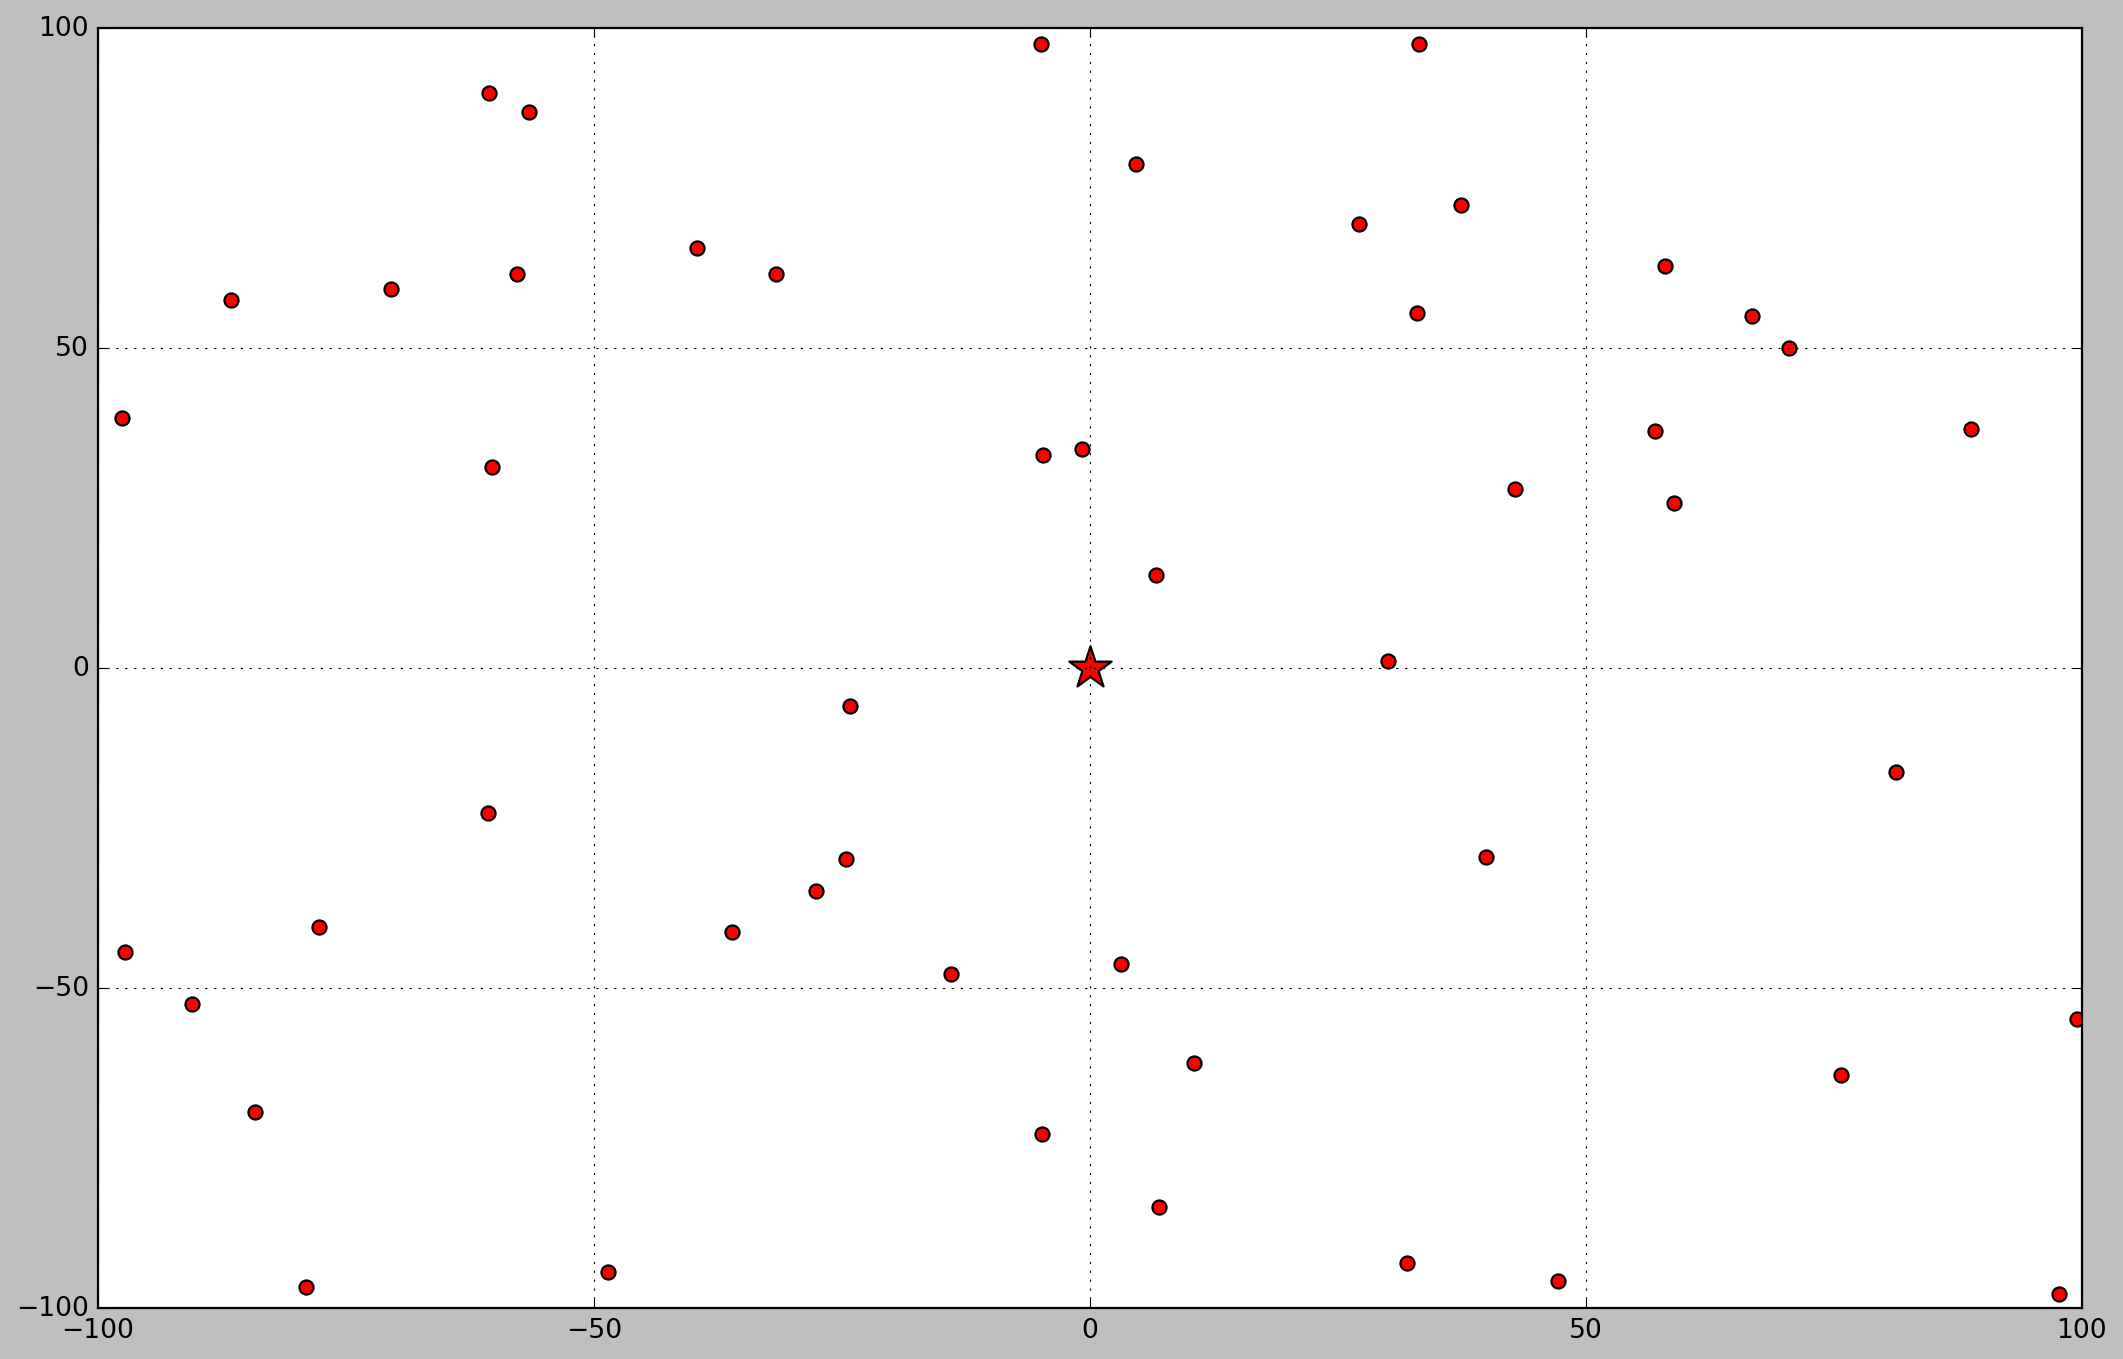

In [59]:
plt.scatter(data.x, data.y, c='r', marker='o', s=40)
plt.scatter(data.iloc[0].x, data.iloc[0].y, marker='*', c='r', s=400)
plt.axis([-100,100,-100,100])
plt.grid(True)

## Calcular matriz de distancias y mostrarla

In [60]:
distance_func = lambda a,b: np.sqrt((a.x-b.x)**2 + (a.y-b.y)**2)
def compute_distances(dfunc=distance_func):
    for i in range(size):
        current=data.iloc[i]
        data[i]=dfunc(current, data)
        #data[str(i)][i]=np.nan

%time compute_distances()
data


CPU times: user 15.6 ms, sys: 1.23 ms, total: 16.8 ms
Wall time: 16.5 ms


,x,y,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.000000,0.000000,30.094619,98.906970,86.402846,103.078947,106.124389,74.577630,106.846484,...,91.965165,78.971789,64.315738,103.904400,24.917425,109.046118,38.579407,104.642190,64.819480,86.489712
1,30.074848,1.090675,30.094619,0.000000,79.199277,63.440275,96.539672,123.683115,68.434599,98.436519,...,116.053934,81.796466,37.999526,129.552766,54.734754,134.206331,62.740873,131.961196,93.853813,65.197564
2,75.720294,-63.631955,98.906970,79.199277,0.000000,113.781493,166.719068,128.062552,141.682044,42.996311,...,190.872134,159.210568,91.072508,202.488130,115.424553,160.001180,105.852751,166.589287,142.436364,118.959285
3,70.446614,50.027257,86.402846,63.440275,113.781493,0.000000,60.390171,187.123389,47.464297,147.701132,...,141.139944,71.828129,26.781647,157.196752,109.935904,195.326215,124.061110,190.846780,149.976706,6.182728
4,33.220333,97.579090,103.078947,96.539672,166.719068,60.390171,0.000000,208.633848,28.765741,193.924735,...,110.504044,34.171628,76.162219,126.336255,118.328571,204.051499,139.826518,194.526855,152.618909,54.209591
5,-48.606315,-94.338815,106.124389,123.683115,128.062552,187.123389,208.633848,0.000000,180.468687,95.852974,...,155.054693,181.177233,161.258470,156.469327,91.764374,43.492335,68.919349,59.182409,72.644540,188.700384
6,27.143823,69.462477,74.577630,68.434599,141.682044,47.464297,28.765741,180.468687,0.000000,166.517540,...,98.081035,24.369748,53.922482,114.350706,91.178517,177.911850,111.877577,169.479216,127.335045,42.175465
7,47.234925,-95.838578,106.846484,98.436519,42.996311,147.701132,193.924735,95.852974,166.517540,0.000000,...,194.594473,179.789935,122.265332,203.478758,114.884349,134.064375,97.584609,144.380857,130.384557,152.086134
8,-77.679374,-40.455252,87.582604,115.486087,155.140639,173.575323,177.065594,61.226474,151.887491,136.641483,...,99.898223,144.941359,151.817139,98.312498,63.672748,29.584457,54.184399,17.614248,24.552472,173.123815
9,37.394038,72.325211,81.420208,71.609564,141.255984,39.870685,25.596449,187.544551,10.642469,168.451485,...,108.589397,33.386388,51.184081,124.857426,99.554021,186.661854,119.406464,178.736363,136.587948,34.099663


## Funciones de ayuda

In [61]:
estimate_cost = lambda route: sum(data.iloc[i][j] for i,j in zip(route, route[1:]))
get_coords = lambda route: list(zip(*[(data.iloc[i].x,data.iloc[i].y) for i in route]))

# Algoritmo heurístico constructivo: Vecino más cercano

### Aplicar el algoritmo

In [62]:
def nearest_neighbor(unserved, stop_condition=lambda route, target: False):
    current=0 #depot
    result_path=[]
    while True:
        result_path.append(current)
        unserved.remove(current)
        if not unserved:
            break

        current=data.iloc[unserved,current+2].idxmin()
        if stop_condition(result_path, int(current)):
            if len(result_path)>1:
                break

    result_path.append(0)
    return result_path

%time route = nearest_neighbor(list(range(size)))
print('cost={}\nroute={}'.format(estimate_cost(route),route))

CPU times: user 5.03 ms, sys: 803 μs, total: 5.83 ms
Wall time: 5.68 ms
cost=1566.4012576217608
route=[0, np.int64(20), np.int64(33), np.int64(14), np.int64(26), np.int64(17), np.int64(15), np.int64(40), np.int64(43), np.int64(21), np.int64(10), np.int64(44), np.int64(46), np.int64(39), np.int64(16), np.int64(34), np.int64(30), np.int64(18), np.int64(38), np.int64(22), np.int64(36), np.int64(7), np.int64(2), np.int64(24), np.int64(37), np.int64(11), np.int64(1), np.int64(19), np.int64(42), np.int64(29), np.int64(3), np.int64(49), np.int64(12), np.int64(9), np.int64(6), np.int64(31), np.int64(41), np.int64(32), np.int64(4), np.int64(35), np.int64(28), np.int64(5), np.int64(25), np.int64(45), np.int64(47), np.int64(23), np.int64(8), np.int64(48), np.int64(27), np.int64(13), 0]


### Gráfica de la ruta

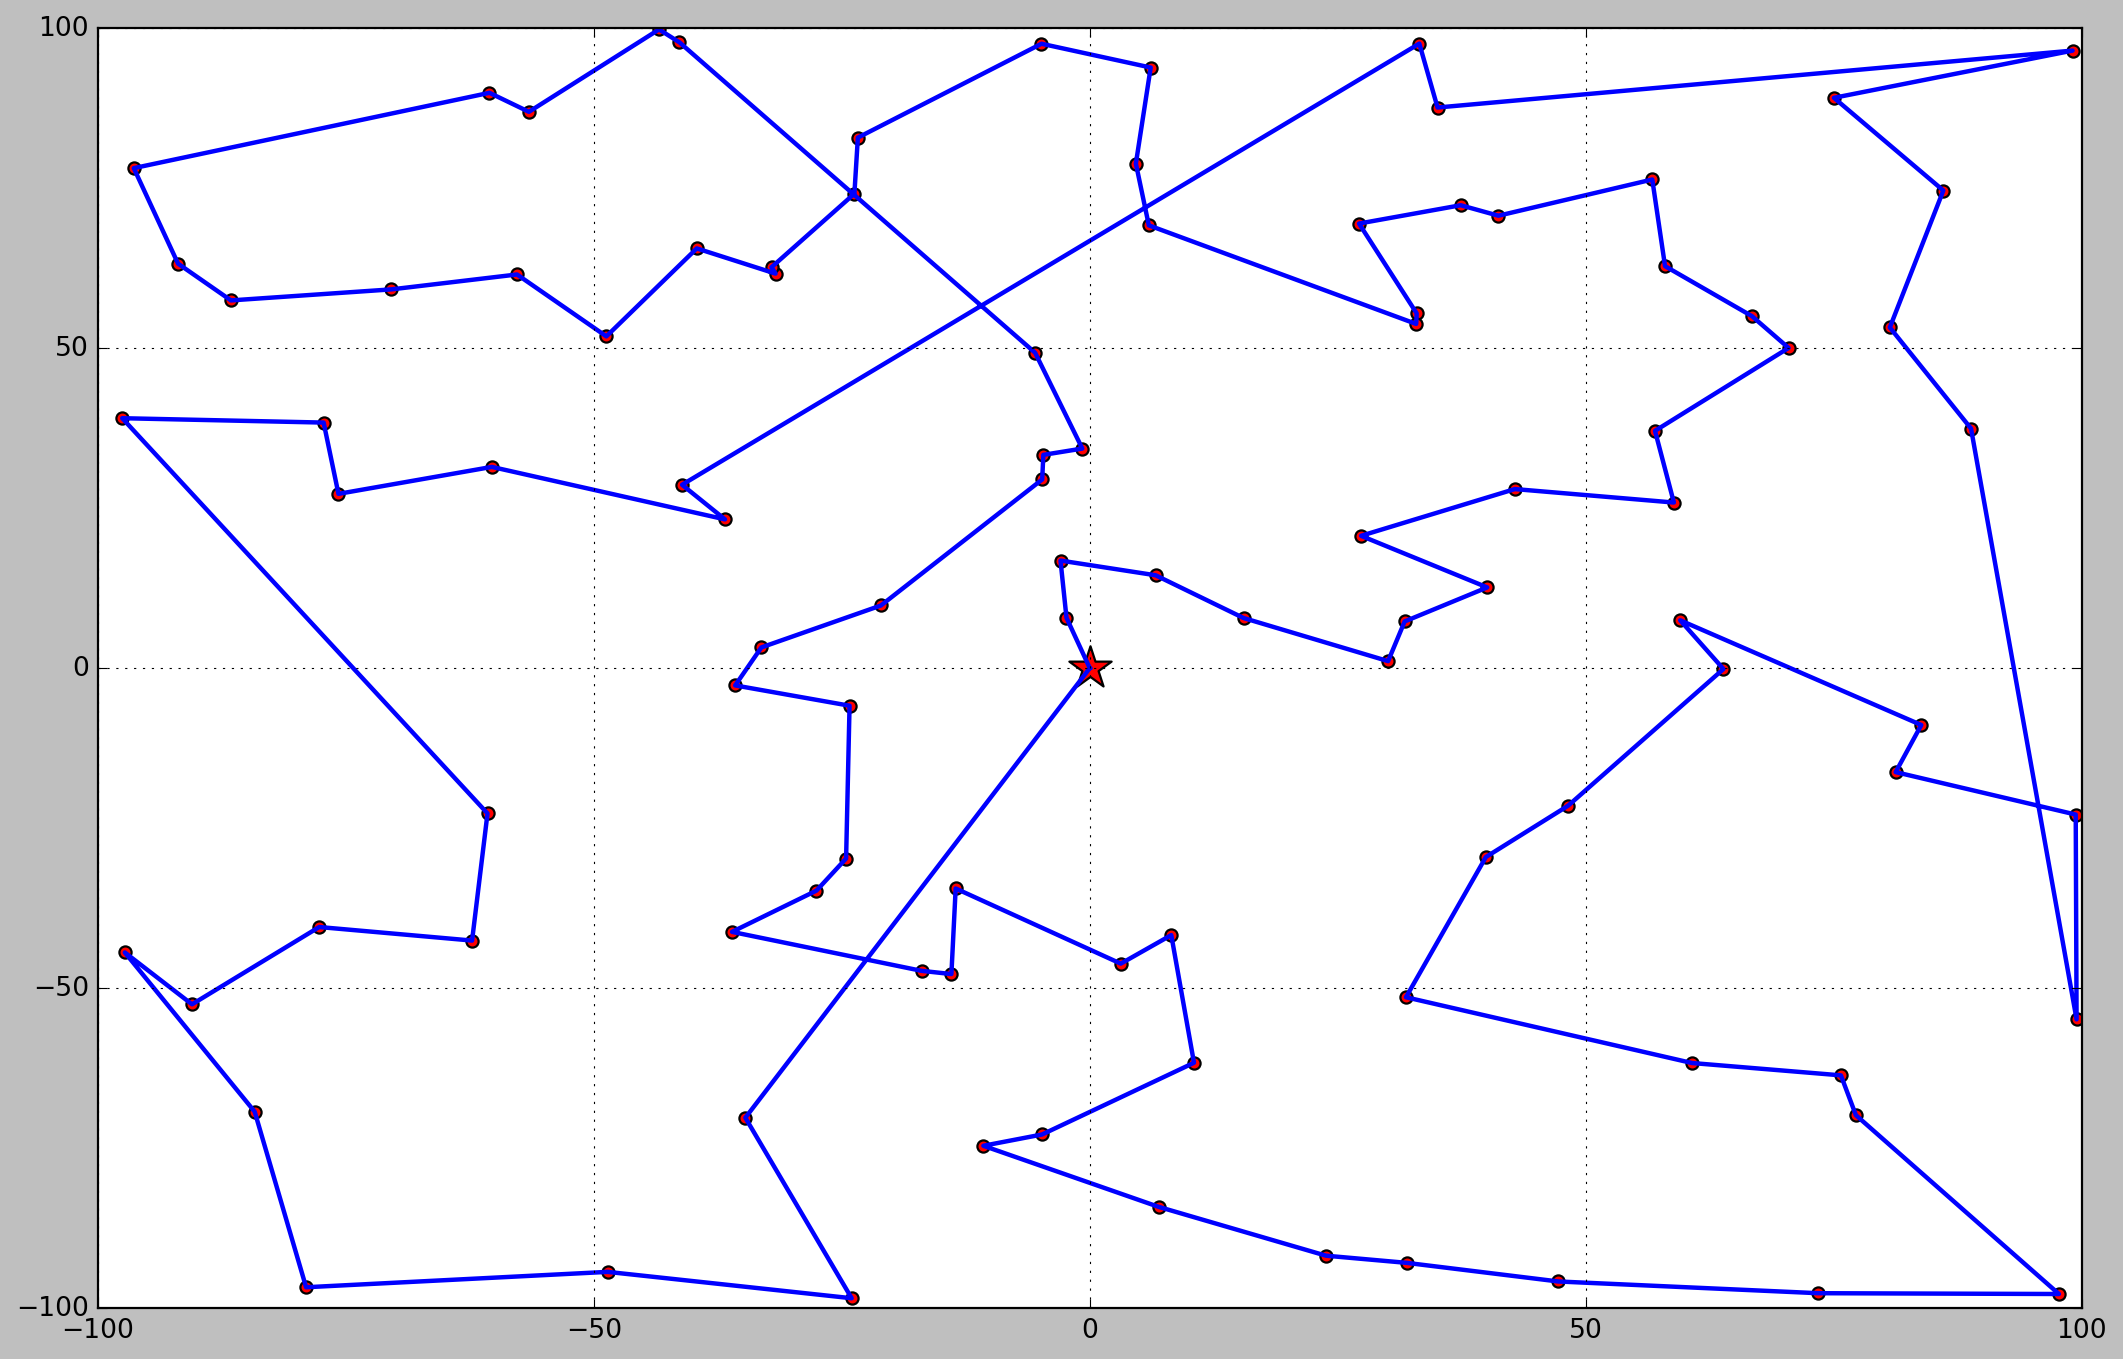

In [47]:
coords=get_coords(route)
plt.plot(coords[0], coords[1], 'b-', linewidth=2)
plt.scatter(data.x, data.y, c='r', s=30)
plt.scatter(data.iloc[0].x, data.iloc[0].y, marker='*', c='r', s=400)
plt.axis([-100,100,-100,100])
plt.grid(True)

# Algoritmo heurístico de mejora 2-opt
En primer lugar, apliquemos el algoritmo de mejora 2-opt, sobre la solución obtenida por el algoritmo constructivo del "Vecino más cercano" y veamos cuánto es capaz de mejorar. La solución de partida es:

In [48]:
print('cost={}\nroute={}'.format(estimate_cost(route),route))


cost=1935.1243844410028
route=[0, np.int64(53), np.int64(60), np.int64(20), np.int64(66), np.int64(1), np.int64(51), np.int64(91), np.int64(55), np.int64(19), np.int64(42), np.int64(29), np.int64(3), np.int64(49), np.int64(12), np.int64(73), np.int64(86), np.int64(9), np.int64(6), np.int64(31), np.int64(70), np.int64(71), np.int64(41), np.int64(76), np.int64(32), np.int64(97), np.int64(88), np.int64(78), np.int64(26), np.int64(17), np.int64(56), np.int64(15), np.int64(40), np.int64(43), np.int64(68), np.int64(61), np.int64(13), np.int64(27), np.int64(89), np.int64(59), np.int64(65), np.int64(33), np.int64(14), np.int64(52), np.int64(64), np.int64(87), np.int64(98), np.int64(44), np.int64(46), np.int64(39), np.int64(16), np.int64(67), np.int64(34), np.int64(75), np.int64(30), np.int64(57), np.int64(18), np.int64(38), np.int64(96), np.int64(22), np.int64(92), np.int64(36), np.int64(7), np.int64(58), np.int64(28), np.int64(63), np.int64(2), np.int64(50), np.int64(69), np.int64(11), np.int

## Aplicar el algoritmo (sobre solución construida)
En cada paso nos va a indicar el arco que intercambia y el ahorro que supone dicho intercambio

In [ ]:
def twoOptSwap(route,i,j):
    t=route[i:j+1];
    t.reverse();
    route[i:j+1]=t

def twoOpt(route):
    cost=estimate_cost(route)

    def inner():
        nonlocal cost
        for i in range(1,len(route)-2):
            nodei=data.iloc[route[i]]
            for j in range(i+1,len(route)-1):
                nodej=data.iloc[route[j]]
                save=nodei.iloc[route[i-1]+2]+nodej.iloc[route[j+1]+2] - (nodej.iloc[route[i-1]+2]+nodei.iloc[route[j+1]+2])
                if save>0:
                    twoOptSwap(route,i,j)

                    cost-=save
                    print('Iteration exchanging {}-{},{}-{} with {}-{},{}-{} => save={} => cost: {}'.format(
                            route[i-1],route[i],route[j],route[j+1],route[i-1],route[j],route[i],route[j+1],save,cost))
                    return False
        return True

    while True:
        if inner():
            break

%time twoOpt(route)



Iteration 15 exchanging 12-84,73-90 with 12-73,84-90 => save=0.7127980143128809 => cost: 1934.4115864266898
Iteration 2 exchanging 53-64,60-52 with 53-60,64-52 => save=2.8803537373675177 => cost: 1931.5312326893222
Iteration 9 exchanging 16-72,67-0 with 16-67,72-0 => save=19.096015105010437 => cost: 1912.4352175843119
Iteration 14 exchanging 45-47,23-8 with 45-23,47-8 => save=7.811184473302305 => cost: 1904.6240331110096
Iteration 23 exchanging 10-82,94-4 with 10-94,82-4 => save=4.7753822069069685 => cost: 1899.8486509041027
Iteration 25 exchanging 94-70,4-71 with 94-4,70-71 => save=17.702601633785335 => cost: 1882.1460492703172
Iteration 25 exchanging 94-59,70-65 with 94-70,59-65 => save=23.04555268107528 => cost: 1859.1004965892419
Iteration 19 exchanging 48-94,21-59 with 48-21,94-59 => save=13.498825145619662 => cost: 1845.6016714436223
Iteration 5 exchanging 98-48,44-94 with 98-44,48-94 => save=0.06690026420336892 => cost: 1845.5347711794188
Iteration 2 exchanging 53-44,64-94 with 

La nueva ruta obtenida por el algoritmo 2-opt es la siguiente

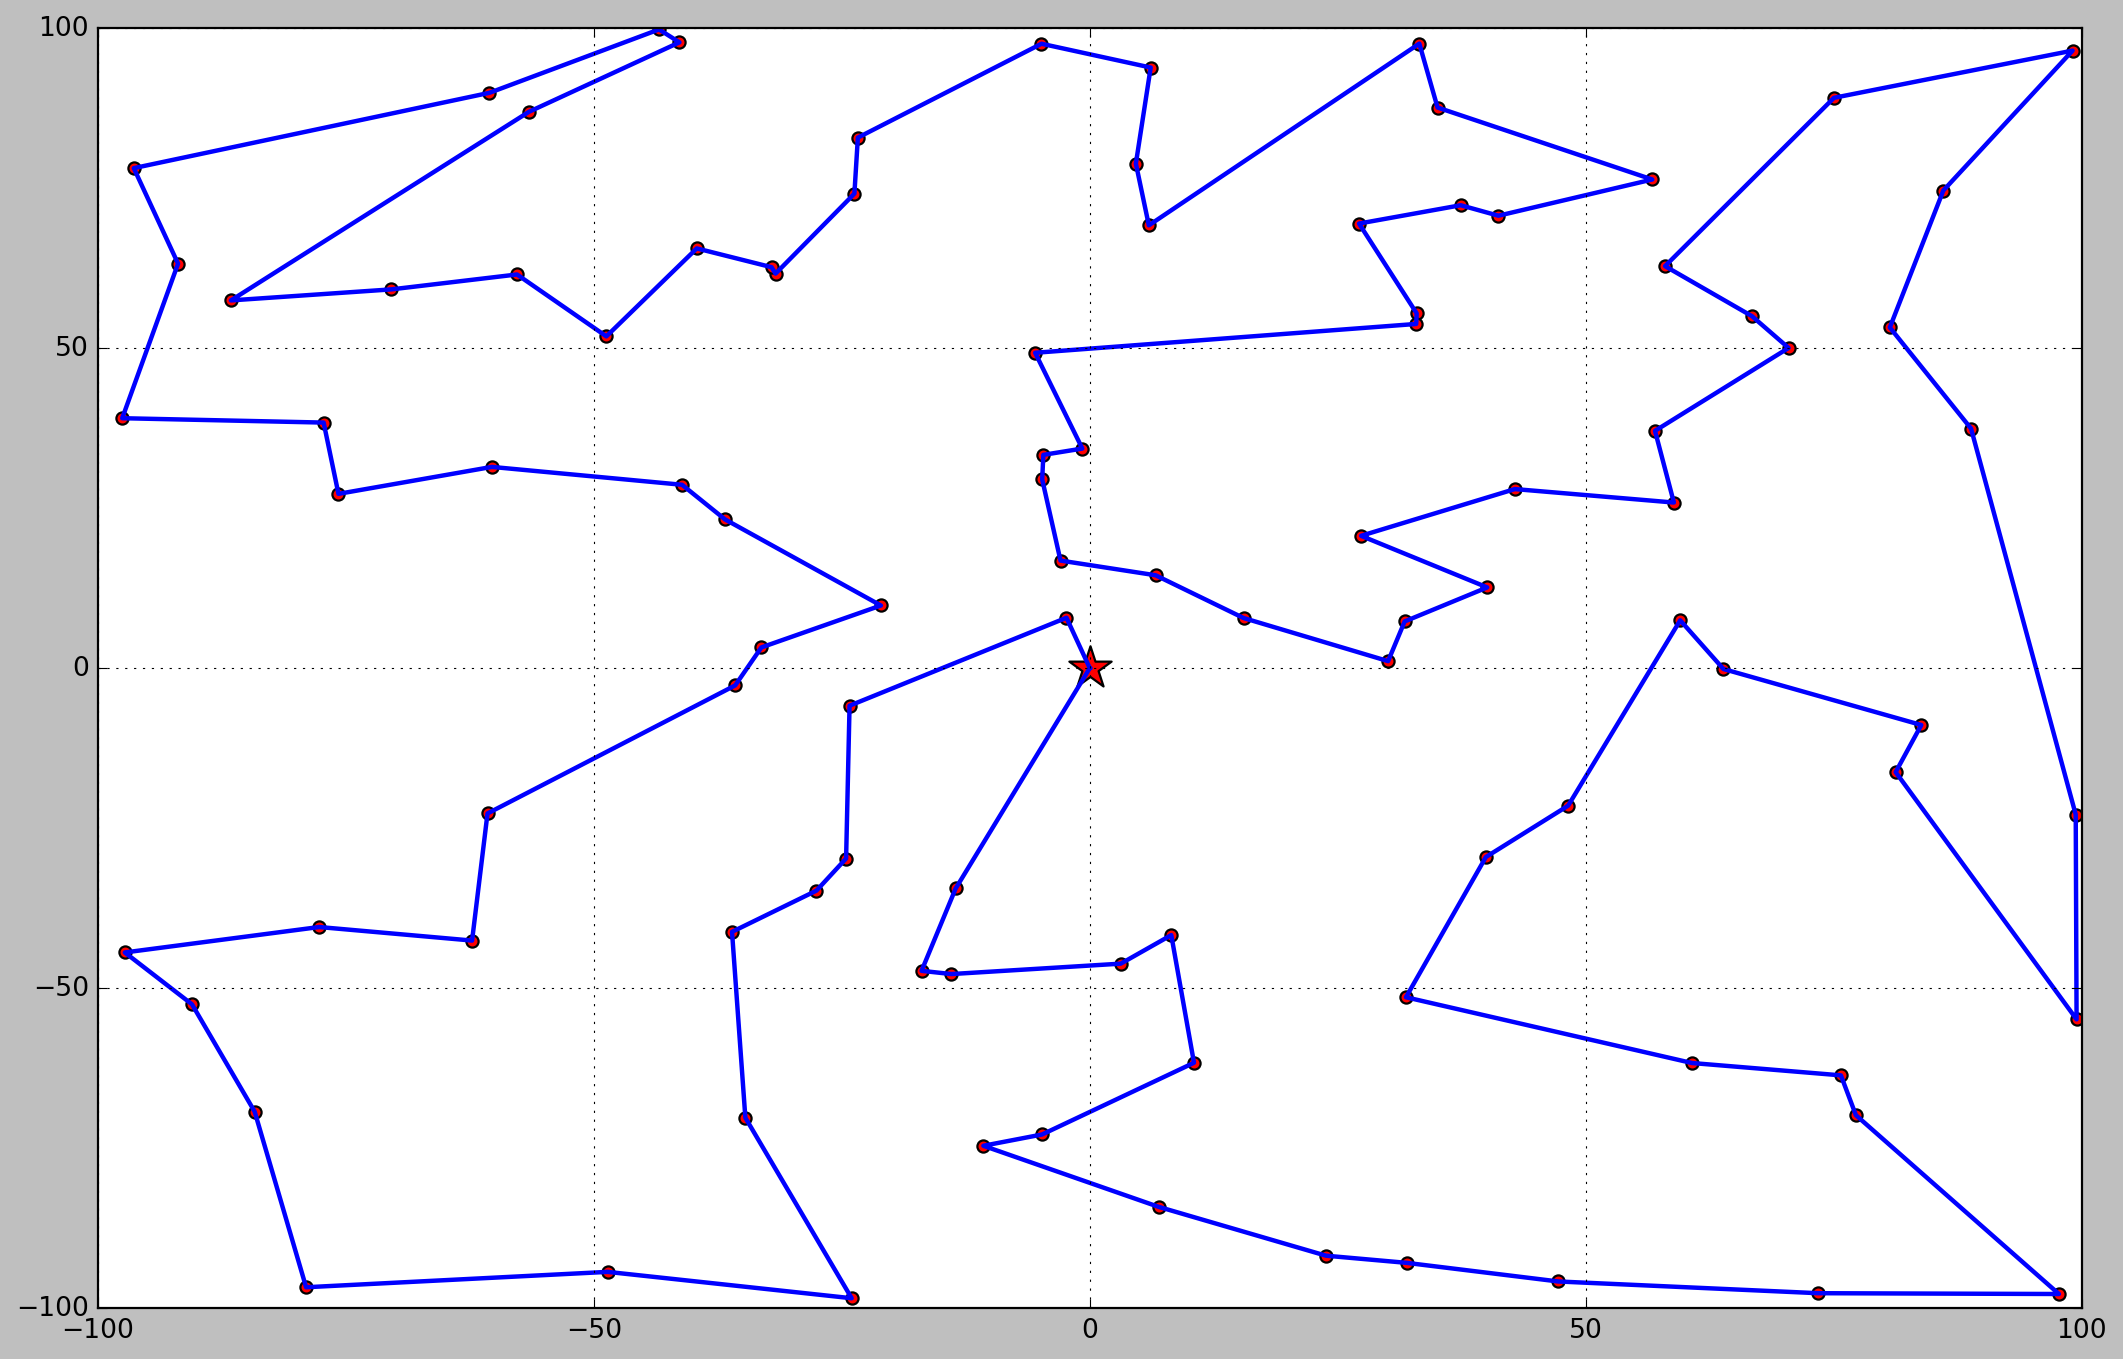

In [50]:
coords=get_coords(route)
plt.plot(coords[0], coords[1], 'b-', linewidth=2)
plt.scatter(data.x, data.y, c='r', s=30)
plt.scatter(data.iloc[0].x, data.iloc[0].y, marker='*', c='r', s=400)
plt.axis([-100,100,-100,100])
plt.grid(True)

In [51]:
print('cost={}\nroute={}'.format(estimate_cost(route),route))


cost=1791.9302262933027
route=[0, np.int64(53), np.int64(44), np.int64(46), np.int64(39), np.int64(16), np.int64(72), np.int64(79), np.int64(5), np.int64(25), np.int64(45), np.int64(47), np.int64(23), np.int64(8), np.int64(99), np.int64(48), np.int64(98), np.int64(87), np.int64(64), np.int64(94), np.int64(82), np.int64(10), np.int64(62), np.int64(80), np.int64(21), np.int64(68), np.int64(61), np.int64(13), np.int64(89), np.int64(59), np.int64(27), np.int64(43), np.int64(40), np.int64(15), np.int64(56), np.int64(17), np.int64(78), np.int64(26), np.int64(88), np.int64(97), np.int64(32), np.int64(76), np.int64(41), np.int64(71), np.int64(4), np.int64(90), np.int64(73), np.int64(86), np.int64(9), np.int64(6), np.int64(31), np.int64(70), np.int64(65), np.int64(33), np.int64(14), np.int64(52), np.int64(60), np.int64(20), np.int64(66), np.int64(1), np.int64(51), np.int64(91), np.int64(55), np.int64(19), np.int64(42), np.int64(29), np.int64(3), np.int64(49), np.int64(12), np.int64(85), np.int6

## Generar ruta aleatoria
A continuación, para mostrar la eficacia del algoritmo 2-opt, vamos a partir de una ruta aleatoria en lugar de partir de la ruta obtenida por un algoritmo constructivo. A continuación generamos aleatoriamente la ruta, la mostramos junto a su coste y la visualizamos gráficamente.

In [52]:
route = [x for x in range(size)]+[0]


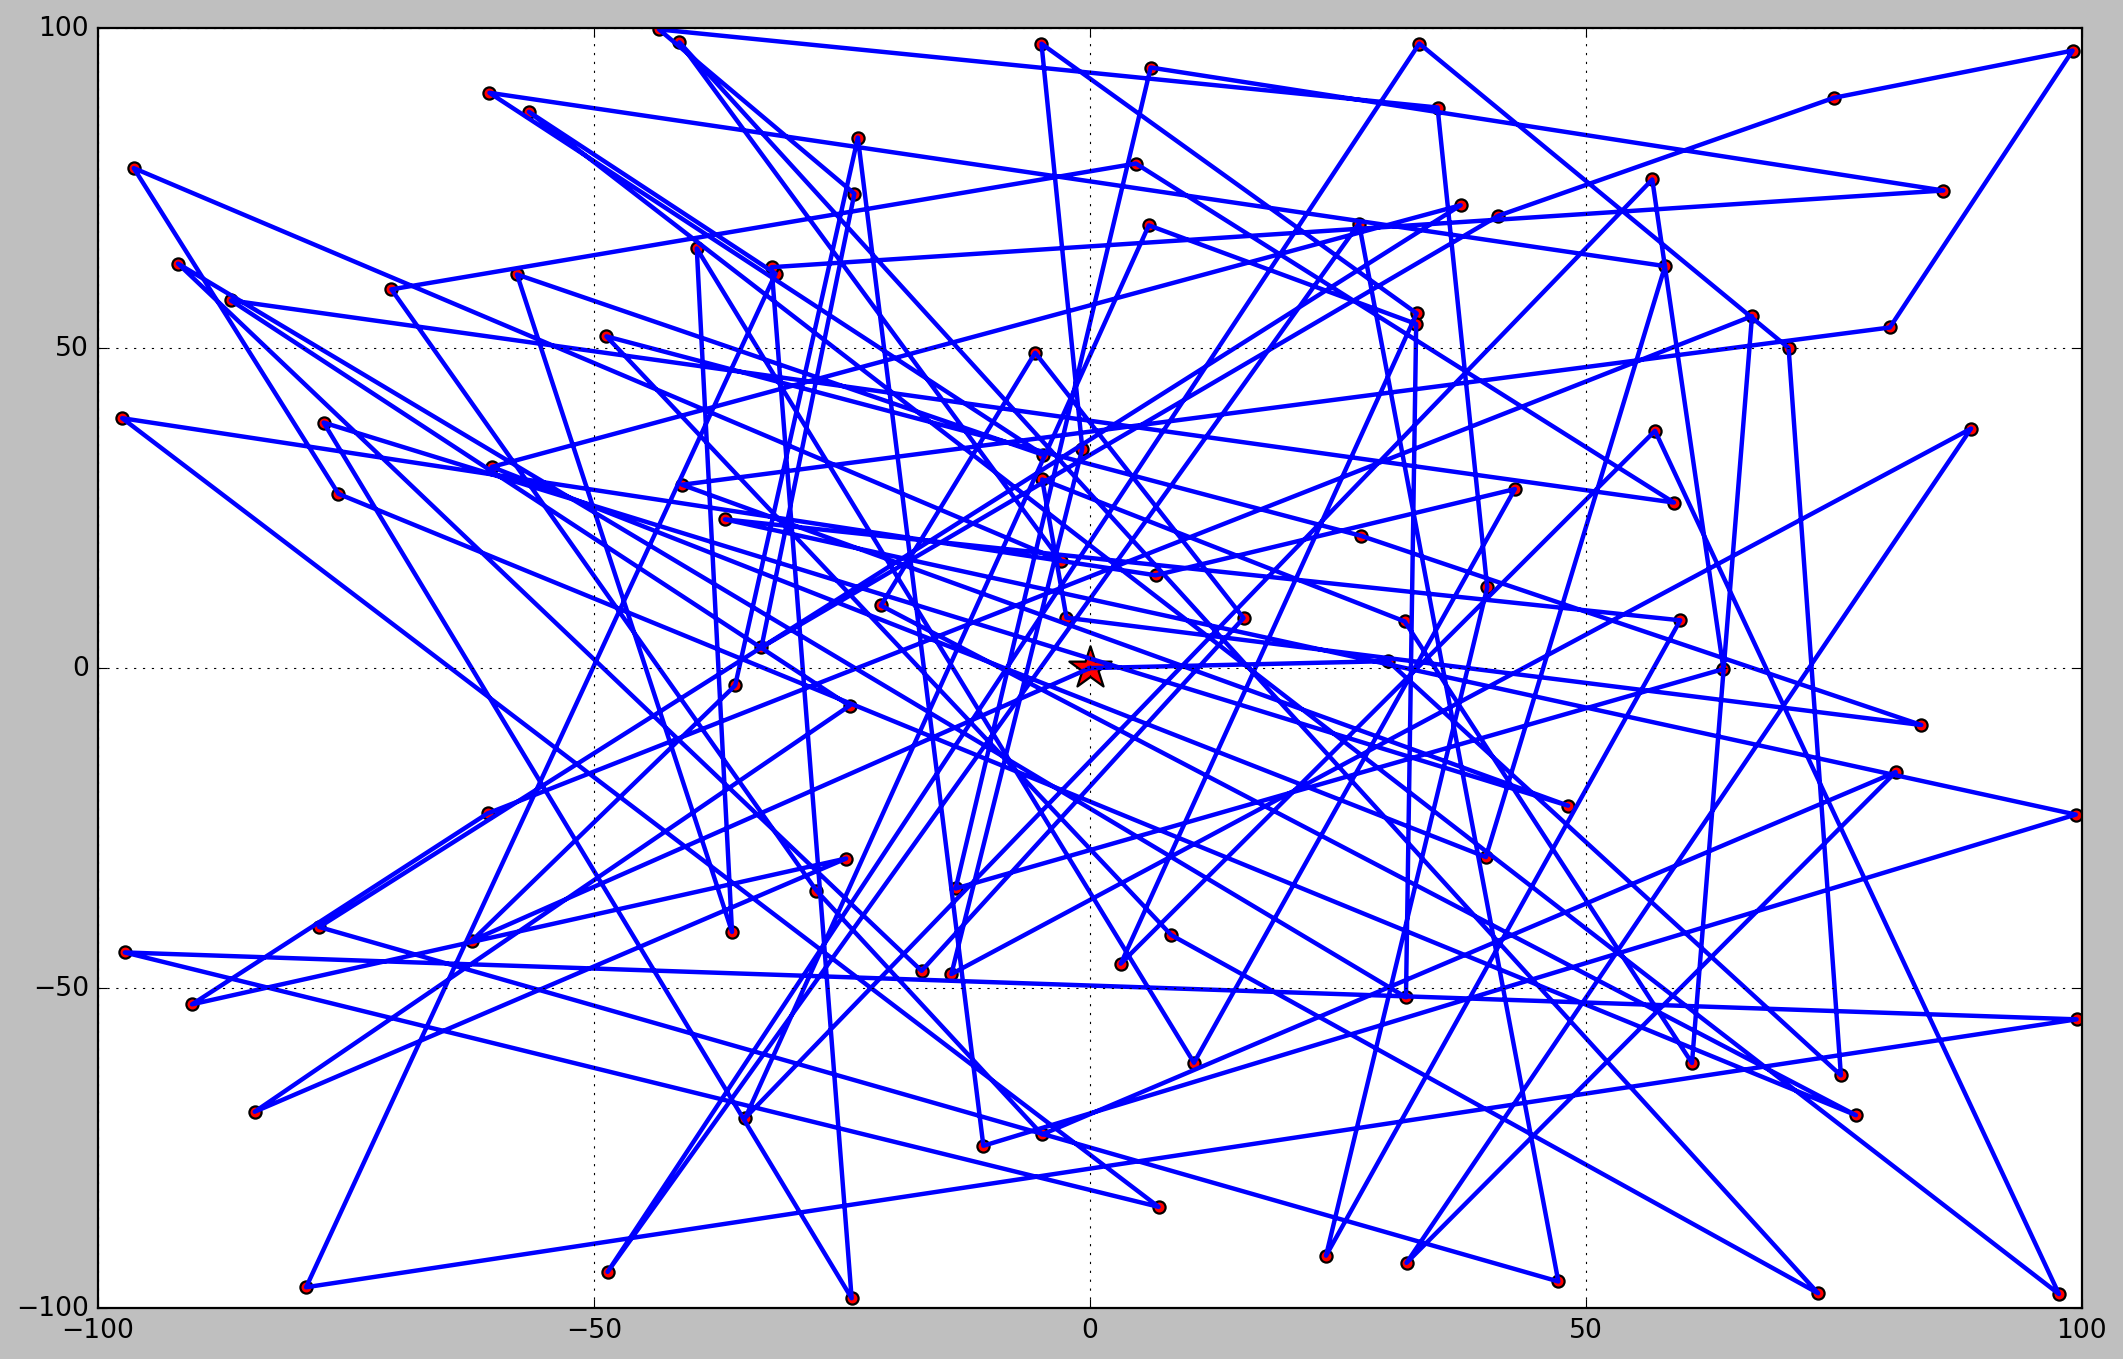

In [53]:
coords=get_coords(route)
plt.plot(coords[0], coords[1], 'b-', linewidth=2)
plt.scatter(data.x, data.y, c='r', s=30)
plt.scatter(data.iloc[0].x, data.iloc[0].y, marker='*', c='r', s=400)
plt.axis([-100,100,-100,100])
plt.grid(True)

In [54]:
print('cost={}\nroute={}'.format(estimate_cost(route),route))

cost=10340.151782358816
route=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 0]


## Aplicar el algoritmo (sobre ruta aleatoria)
Ahora, aplicamos sobre la ruta aleatoria el algoritmo de mejora 2-opt


In [55]:
%time twoOpt(route)

Iteration 1 exchanging 0-4,1-5 with 0-1,4-5 => save=11.966404491447804 => cost: 10328.185377867369
Iteration 1 exchanging 0-5,4-6 with 0-4,5-6 => save=148.65750376301747 => cost: 10179.527874104351
Iteration 1 exchanging 0-1,5-2 with 0-5,1-2 => save=27.16649580822525 => cost: 10152.361378296126
Iteration 1 exchanging 0-6,1-7 with 0-1,6-7 => save=23.598010199272267 => cost: 10128.763368096854
Iteration 1 exchanging 0-5,6-1 with 0-6,5-1 => save=23.701757832884823 => cost: 10105.061610263969
Iteration 1 exchanging 0-1,5-7 with 0-5,1-7 => save=78.61331452985205 => cost: 10026.448295734117
Iteration 1 exchanging 0-8,1-9 with 0-1,8-9 => save=32.02762827443513 => cost: 9994.420667459683
Iteration 1 exchanging 0-7,8-5 with 0-8,7-5 => save=15.362620333873394 => cost: 9979.058047125809
Iteration 1 exchanging 0-5,7-2 with 0-7,5-2 => save=85.78833506582373 => cost: 9893.269712059986
Iteration 1 exchanging 0-8,5-7 with 0-5,8-7 => save=59.33029366320022 => cost: 9833.939418396785
Iteration 1 exchang

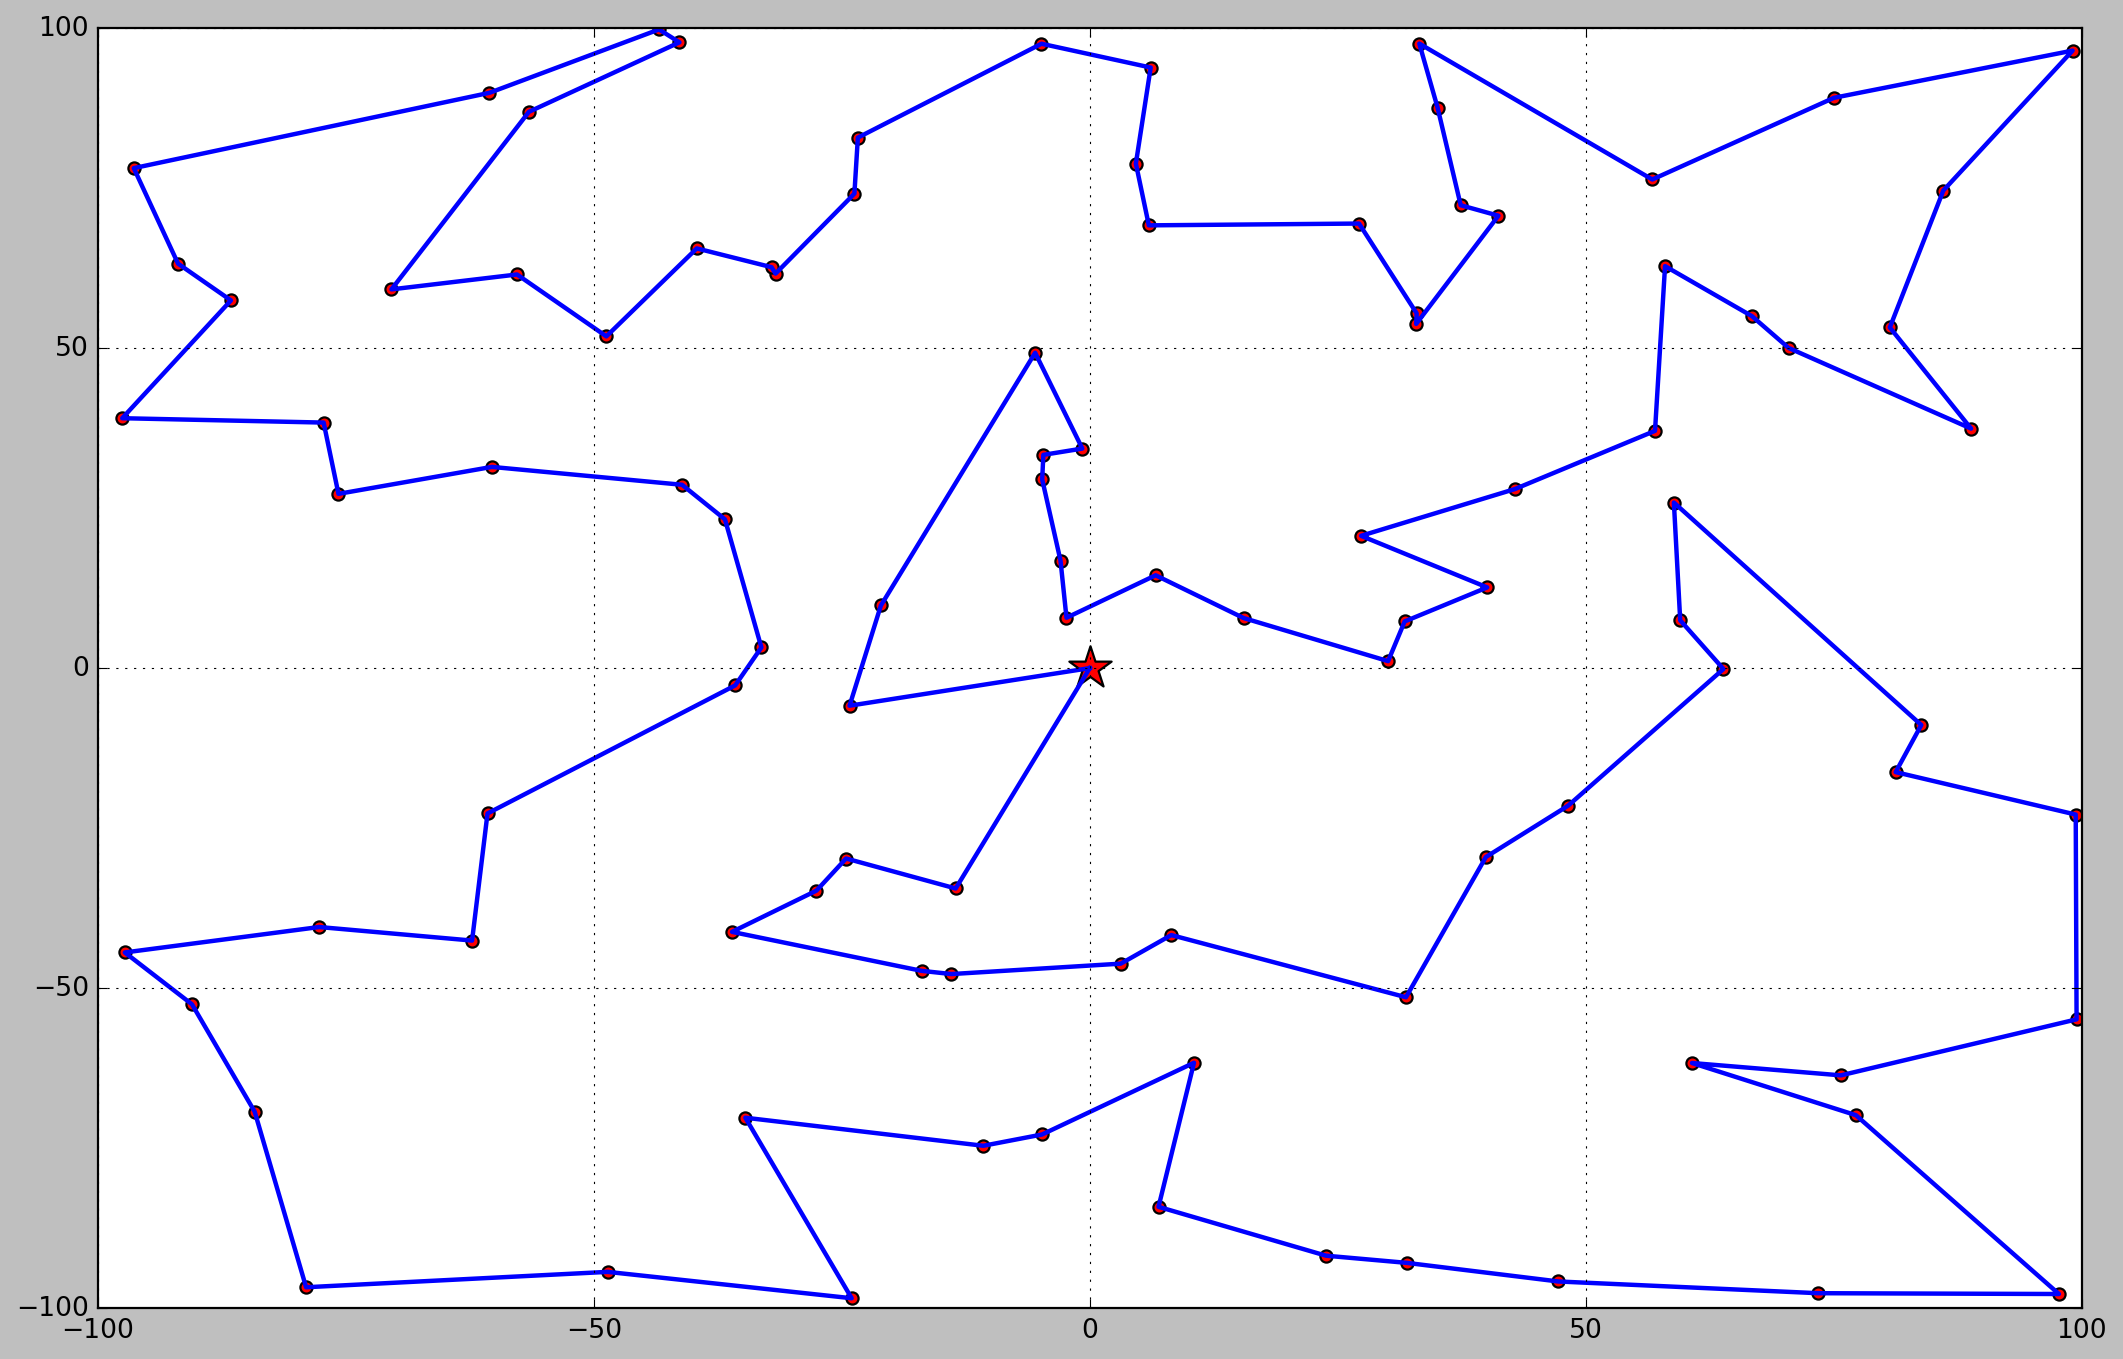

In [56]:
coords=get_coords(route)
plt.plot(coords[0], coords[1], 'b-', linewidth=2)
plt.scatter(data.x, data.y, c='r', s=30)
plt.scatter(data.iloc[0].x, data.iloc[0].y, marker='*', c='r', s=400)
plt.axis([-100,100,-100,100])
plt.grid(True)

In [57]:
print('cost={}\nroute={}'.format(estimate_cost(route),route))

cost=1737.0313427413453
route=[0, 75, 46, 39, 16, 67, 34, 30, 57, 69, 11, 81, 74, 93, 42, 54, 37, 95, 24, 2, 50, 63, 28, 58, 7, 36, 92, 22, 18, 38, 96, 72, 79, 5, 25, 45, 47, 23, 8, 99, 48, 98, 87, 94, 82, 10, 62, 80, 21, 43, 68, 61, 13, 89, 59, 27, 40, 15, 56, 17, 78, 26, 88, 97, 32, 76, 41, 71, 6, 31, 70, 86, 9, 90, 4, 73, 85, 84, 77, 83, 35, 3, 49, 12, 29, 19, 55, 91, 51, 1, 66, 20, 53, 60, 52, 14, 33, 65, 64, 44, 0]


# Ejercicio
Para destacar la importancia de la solución de la que parte un algoritmo de mejora, sobre todo en tiempo de resolución, se pide comparar el coste inicial y el final, así como el tiempo de ejecución en ambos casos (al partir de una solución dada y al partir de una solución aleatoria) para dos instancias generadas aleatoriamente con 50 y 100 puntos a visitar.



# PRÁCTICA 1

Modificar el código para conseguir:

1) Que los datos generados aleatoriamente los grafique sin seleccionar por defecto el punto (0, 0) como punto de partida.

2) Que una vez generados los datos aleatoriamente y graficados, permita al usuario establecer el nodo de partida. Después, volver a generar la gráfica marcando el nodo de partida para diferenciarlo del resto.
[Notas] Por ejemplo, poner otro punto de partida y que se muestre como una estrella.

3) Que aplique el algoritmo constructivo del vecino más cercano partiendo del nodo elegido en el paso anterior.
[Notas] Parta del punto anterior como punto de partida y no del (0,0)

4) Implementar el algoritmo constructivo de inserción para los datos generados aleatoriamente. La variante a implementar se elegirá obteniendo el resto de dividir el NIE/NIF (sin letra) entre 4 (las variantes se han numerado en clase entre 0 y 3).
[Notas] El algoritmo de inserción, implementar la variante X del algoritmo. (No está implementado)

5) Comparar, para instancias de distintos tamaños, los resultados que ofrece el algoritmo implementado con los ofrecidos, para esas mismas instancias, por el algoritmo del vecino más cercano. ¿Qué algoritmo se comporta mejor?
[Notas] Diferentes instancias es diferentes conjuntos de puntos (30, 50, 70, 100)